 Introduction to CRPropa3 with examples
=====

## Prologue

The field of cosmic rays intersects various physical topics since cosmic rays when they traverse the universe, are affected by the whole range of phenomena, from galactic environments to the cosmic microwave background and the expansion of the universe. To investigate and to better understand their behaviour and nature in such a complex context a Monte Carlo type of numerical analysis imposes itself as a logical approach. **CRPropa3** is a numerical framework which fits that purpose. It is a freely available GPLv3-licensed, highly flexible and modular code which preserves the crucial requirement of a Monte Carlo method - the code performance. Since it is so modular CRPropa3 can be used to propagate another type of particles like neutrinos or photons, but here we will focus primarily on cosmic rays.

This introductory text will try to explain basics concepts, give an overview of available modules, parameters and settings while demonstrating good practices on how to use CRPropa and eventually try to lure the reader to discover and read the source code of the framework himself. In the same time, the text can lead to a better understanding of ultra-high energy cosmic rays. Yet, one should always keep in mind that a computer code can never substitute the richness of the reality, so understanding underlying assumptions and limitations of code is crucial.

Although the most of the code is written in C++, CRPropa can be easily used and extended with Python. The Python interface is also the recommended way how to use the framework, and it will be used in the tutorial. Therefore, intermediate knowledge of Python is somewhat necessary to follow the text.

## Installation and usage inside Jupyter

### Virtualenv - a virtual environment for Python

Through the text, we will use different python modules in addition to CRPropa. The simplest way to install the most recent versions of them is to use python package manager called **pip**. Without contaminating the whole system, we will keep the setup in a local context, tied to the user, not system. With it, we also ensure better reproducibility and avoid some common pitfalls. The additional benefit of using it is having different versions of programs installed at the same time without conflicts.

Obtain first **virtualenv**, a small set of scripts which will help us to set up an isolated python environment. The preferable way to obtain it is from your distribution's repository, for example:
* Ubuntu/Debian: ```# apt install python-virtualenv```,
* Fedora/RedHat: ```# dnf install python3-virtualenv```,
* Mac OS X: ```# pip install virtualenv``` (if python is already installed, if not, install python first!).

We will define a temporary shell variable ``$CRPROPA_DIR`` in which will store the path of the crpropa installation and our isolated python environment, like

```$ export CRPROPA_DIR=$HOME/crpropa_env```

or any other location where the current user can write.

Virtualenv will create a new python virtual environment by typing:

```$ virtualenv -p python3 $CRPROPA_DIR```

where *python3* can be substituted with *python2* if one wishes or if python3 is not available on the system.

From now on, the environment can be started by calling:

```$ . $CRPROPA_DIR/bin/activate```

where we recall that `$CRPROPA_DIR` is the path where we put the installation. The environment can be deactivated by calling ```deactivate```. For those who want to simplify further the procedure of creating, activating and switching between different python environments look for a package named `virtualenvwrapper`.

To install a python package in the environment just use:

```$ pip install packagename```

for example, we will need those later:

```$ pip install numpy matplotlib ipyvolume scipy healpy jupyter pint```

Remember, we do need basic development packages like compilers, standard libraries and so on. How to install those will not be covered here, but it can be found in the OS documentation. The error logs can be very helpful, too. On the other hand, the dependencies specific to CRPropa will be discussed in the next section.

### Installing or building dependencies

CRPropa provides additional features if it is complied with some additional libraries. The full list of the additional libraries can be found [here](https://github.com/CRPropa/CRPropa3/wiki/Installation#Dependencies). If those libraries are not present, CRPropa will automatically disable the additional features they provide. Thus they are not mandatory. Installing those dependencies can be done either from the repository (preferred way) or directly from the source.

For example, to install FFTW which provides the ability for CRPropa to generate turbulent magnetic fields, one could install `libfftw3-dev` for Ubuntu (or `fftw-devel` for Fedora) from the repository, or to install if from the source:

```$ export FFTW_BUILD=$CRPROPA_DIR/fftw_build
$ wget http://www.fftw.org/fftw-3.3.7.tar.gz \
    --no-clobber --directory-prefix=$CRPROPA_DIR
$ mkdir $FFTW_BUILD
$ tar xvf "$CRPROPA_DIR/fftw-3.3.7.tar.gz" --strip 1 -C $FFTW_BUILD
$ cd $FFTW_BUILD
$ ./configure --prefix=$CRPROPA_DIR \
    --enable-float --enable-shared CFLAGS=-fPIC
$ make && make install```

The same goes for SWIG, which is required to use the python interface. Therefore, either install a package called `swig` from the repository or install it from source:

```$ export SWIG_BUILD=$CRPROPA_DIR/swig_build
$ wget http://prdownloads.sourceforge.net/swig/swig-3.0.12.tar.gz \
    --no-clobber --directory-prefix=$CRPROPA_DIR
$ mkdir $SWIG_BUILD
$ tar xvf "$CRPROPA_DIR/swig-3.0.12.tar.gz" --strip 1 -C $SWIG_BUILD
$ cd $SWIG_BUILD
$ ./configure --prefix=$CRPROPA_DIR
$ make && make install```

Libraries `zlib` and `muparser` are also advisable to have.

### Build and install CRPropa

Now everything is ready to build CRPropa. The python environment is deployed, `numpy` library is installed with `pip`, the optional dependencies are provided.

The source code of CRPropa can be downloaded from GitHub as an archive or directly by cloning the main repository. We will use the latter method because it allows more flexibility later. One should have ***git*** present so that the following works:

```
$ cd $CRPROPA_DIR
$ git clone https://github.com/CRPropa/CRPropa3.git crpropa3_source
$ cd crpropa3_source
$ mkdir build && cd build
$ CMAKE_PREFIX_PATH=$CRPROPA_DIR cmake -DCMAKE_INSTALL_PREFIX=$CRPROPA_DIR ..
$ make && make install```

Notice that `CMAKE_PREFIX_PATH` enables `cmake` to find locally installed libraries (if we built them from source), while `CMAKE_INSTALL_PREFIX` specify where CRPropa will be eventually installed.

By running `make test` we can check that everything works properly. Sometimes statistical tests can fail and in that case try to run tests again. If it fails again - report a bug [here](https://github.com/CRPropa/CRPropa3/issues).

Hopefully, after finishing all the steps, CRPropa is installed and can be accessed through python:

```
$ python
Python 3.6.2 (default, Aug 11 2017, 11:59:59) 
[GCC 7.1.1 20170622 (Red Hat 7.1.1-3)] on linux
Type "help", "copyright", "credits" or "license" for more information.
>>> import crpropa as crp
>>> dir(crp)
```
where the last command will print all available objects in CRPropa

### Deleting CRPropa

By removing the directory `$ rm -rf $CRPROPA_DIR` the CPropa3 installation will be permanently deleted with all dependencies that we installed for it.

### Jupyter - an interactive notebook

**Jupyter** is a handy interactive frontend for python and other programming languages which can be run inside of a web browser. We will use it in this introductory text since crpropa examples can be easily combined with a further analysis and a graphical representation of results, everything within the same notebook. This text is written in it too.

If the python environment is prepared as described above, the jupyter notebook is already ready and can be run by typing:

`$ jupyter notebook`

which will open a new tab in the default web browser with the jupyter web interface.
A new python notebook is created by clicking `File > New Notebook > Python`. The newly created notebook name can be changed by renaming the title "Untitled." More details and the full documentation can be found at [the project's website](http://jupyter.org/documentation.html).

## Basic concepts

By now, CRPropa is installed together with the Juypter interface and we are ready to start.

### Candidates and modules

To use CRPropa commands, tools and classes within Pyhton, the first step is to import it into the main namespace:

In [1]:
from crpropa import *

or, alternatively, if one needs better control over different commands and modules `import crpropa as crp` which will require adding the `crp.` prefix before every command or class initiated from CRPropa.

The principal object of interest, a cosmic ray, within the framework is called a **candidate**. The candidate is a particle described by an associated physical state. The particle state can be defined by many different properties, but two of the most basic ones are particle's **position** and particle's movement **direction**. The actual state of a candidate is referred as "current" one. Here is an example, where Vector3d is a CRPropa object representing a 3D vector:

In [2]:
c = Candidate()
c.current.setPosition(Vector3d(10, 0, 0))
c.current.setDirection(Vector3d(-1, 0, 0))

The candidate itself is a passive object which means that external mechanisms (called **modules**) are needed to change its state. An obvious example of such a module in the context of the primary goals of this framework is a rectilinear propagational module - ``SimplePropagation``. Its purpose, as the name suggests, is to propagate the candidate, i.e. change the candidate's position.

In [3]:
module = SimplePropagation()

To describe how modules act on candidates, one should recall those numerical simulations necessarily discretise the continuity of the real world with computational **steps**. The candidate state is changed by modules in steps. In every step, the module process candidate with the **process method**.

Before continuing with processing, it is worth mentioning that modules can or even must take arguments during the initialization stage to set-up or change their default behaviour and it depends on the specific module which module's settings can be defined or modified. Module's settings are described in [CRPropa documentation](http://crpropa.github.io/CRPropa3/annotated.html). In the already introduced module, ``SimplePropagation``, one could change the minimum and the maximum distance that the candidate can jump within one step. These changes can also be done later, after the initialization, with so-called **setters** (set methods) or just checked with **getters** (get methods).

In [4]:
module = SimplePropagation(1, 3) # (minStep, maxStep)
module.setMaximumStep(2)
print(module.getMaximumStep())

2.0


The process method can be used in a conjunction with any kind of loop, e.g.

In [5]:
for i in range(5):
    module.process(c)
    print("In step {}. position is {}".format(i+1, c.current.getPosition()))

In step 1. position is Vector(9, 0, 0)
In step 2. position is Vector(7, 0, 0)
In step 3. position is Vector(5, 0, 0)
In step 4. position is Vector(3, 0, 0)
In step 5. position is Vector(1, 0, 0)


After five iterations, the position is changed five times in the negative direction of x-axis which is defined by ``setDirection()``. What needs an additional explanation is the propagated distance in these steps. To avoid the clash between different active modules in determining the step size, modules modify the candidate's current step with the minimum prescribed step while setting the maximum one for the next round. In that way, the next step would be bounded by the module which required the smallest maximum step. In this case, the first step was 1 (minStep argument in ``SimplePropagation``), while all the later steps are 2 (given by ``setMaximumStep`` above).

At this point, before introducing a new physical content, a slight digression in a form physical units is needed. All physical quantities and parameters used in the code are in SI units, but it is advisable to use units in every part of the code explicitly. If some units are not defined within the framework, one could use external python library such as [pint](http://pint.readthedocs.io) to make conversions.

In [6]:
print("1 Mpc is {} meters in the international \
system of units, while 1 GeV is {} joules".format(1*Mpc, 1*GeV))

1 Mpc is 3.085677581491367e+22 meters in the international system of units, while 1 GeV is 1.602176487e-10 joules


In [7]:
from pint import UnitRegistry
ureg = UnitRegistry()

def convertunits(unitstring, convertto):
        unitfrom = ureg.parse_expression(unitstring)
        unitto = unitfrom.to(ureg.parse_expression(convertto))
        return unitto.magnitude

fromunits = "eV^-1 m^-2 s^-1 sr^-1"
tounits = "GeV^-1 km^-2 year^-1 sr^-1"
print("Flux = 1 {1} = {0} {2}".format(
    1*convertunits(fromunits, tounits), fromunits, tounits))

Flux = 1 eV^-1 m^-2 s^-1 sr^-1 = 3.1556925974699995e+22 GeV^-1 km^-2 year^-1 sr^-1


The candidate can be almost any classified particle or nucleus with the assumption that its energy is much higher than its mass, i.e. $pc=\sqrt{E^2-(mc^2)^2}\approx E$, so that it travels at the speed of light in the observer reference frame. The reason behind it is that the propagation code by design cannot take into account time in an explicit manner. Particles are distinguished by a particle ID (PID), a numbering scheme defined by the Particle Data Group. CRPropa uses the [HepPID](http://lcgapp.cern.ch/project/simu/HepPDT/HepPDT.2.06.01/HepPID.pdf) implementation of the scheme. For the nuclei identification CRPropa has its own code but also specified by [PDG](http://pdg.lbl.gov/2008/reviews/rpp2008-rev-monte-carlo-numbering.pdf).

After showing ``SimplePropagation`` module, ``NuclearDecay`` is yet another module which is relatively self-contained, hence, can be presented without too much overhead. ``NuclearDecay`` is a module which represents the decay of nucleus. It will act only on unstable nuclei of course. Here is an example:

In [8]:
def decay_distance(pid, E):
    c = Candidate(pid, E)
    c.current.setPosition(Vector3d(0, 0, 0)*Mpc)
    c.current.setDirection(Vector3d(1, 0, 0))
    init_charge = c.current.getCharge()

    module1 = SimplePropagation()
    module2 = NuclearDecay()

    for step in range(200):
        module1.process(c)
        module2.process(c)
        if c.current.getCharge() != init_charge:
            return c.current.getPosition().getR()/pc
            
# Li-8, half-life = 839.9 ms, E = 1 EeV
pid = nucleusId(8, 3)
E = 1*EeV

# make sample
dists = [decay_distance(pid, E) for i in range(5000)]
mean_dist = sum(dists)/len(dists)
print("Mean distance travelled until the decay {} pc".format(mean_dist))

Mean distance travelled until the decay 100.00000000000001 pc


Depending on the energy of the particle, unstable Li-8 will travel a certain distance until it decays. The result can also easily be checked analytically because Li-8 has only one decay channel and compared using ``matplotlib`` plotting library:

1.091964667243672


Text(0,0.5,'Probability')

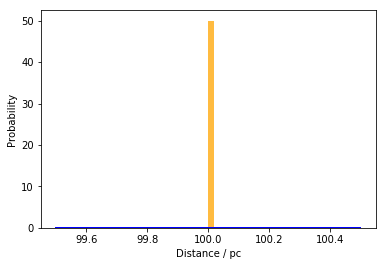

In [9]:
import math

def p_decay(dist):
    """distance should be in pc"""
    halflife = 0.8399 # in s
    mass = 8.02248736*amu
    E = 1*EeV
    
    lifetime = halflife #/ math.log(2)
    gamma = E / (mass * c_squared)
    mean_dist = lifetime*gamma*c_light / pc
    
    return math.exp(-dist/mean_dist)

print(0.8399*1*EeV / (8.02248736*amu * c_squared)*c_light / pc)
    
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

n, bins, patches = plt.hist(dists, 50, normed=1, facecolor='orange', alpha=0.75)
y = [p_decay(b) for b in bins]
plt.plot(bins, y, 'b', linewidth=2)
plt.xlabel('Distance / pc')
plt.ylabel('Probability')

Modules sometimes have an additional functionality. For example, there is a possibility to plot the dependence on energy of the abovementioned decay using the same module but without candidate:

[]

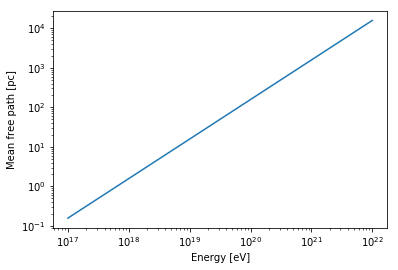

In [10]:
pid = nucleusId(8, 3)
mass = nuclearMass(pid)
energies = 10**np.linspace(17, 22, 100)*eV
meanpath = np.zeros(100)
module = NuclearDecay()

for i, E in enumerate(energies):
    gamma = E / (mass * c_squared)
    meanpath[i] = module.meanFreePath(pid, gamma)

plt.plot(energies / eV, meanpath / pc)
plt.xlabel('Energy [eV]')
plt.ylabel('Mean free path [pc]')
plt.loglog()

### ModuleList and sources

For the sake of transparency and simplicity the first two simulation examples use the explicit for-loop to iterate modules, but it is better to delegate this main loop to CRPropa itself due to performance reasons and some additional features. The **module iterator**, named ``ModuleList``, operates basically like above for-loops: desired modules are added to ``ModuleList`` and then a simulation is being run in its run method.

Here is an example with several other available modules: ``PhotoPionProduction``, ``ElectronPairProduction`` and ``MaximumTrajectoryLength``.

In [11]:
pid = nucleusId(8, 3)
E = 1*EeV
c = Candidate(pid, E)
c.current.setPosition(Vector3d(0, 0, 0)*Mpc)
c.current.setDirection(Vector3d(1, 0, 0))

sim = ModuleList()
sim.add(SimplePropagation())
sim.add(NuclearDecay())
sim.add(PhotoPionProduction(CMB))
sim.add(ElectronPairProduction(CMB))
sim.add(MaximumTrajectoryLength(10*Mpc))

sim.run(c)

print("Charge {} e, Energy: {} EeV"
      .format(c.current.getCharge() / eplus, c.current.getEnergy() / EeV))

Charge 2.0 e, Energy: 0.49889470221750665 EeV


One should take care that there is at least one stopping condition, like ``MaximumTrajectoryLength`` module here, otherwise the loop would never end.

Manually preparing and inserting individual candidates into the simulation box, like in above examples, is sometimes useful for specific purposes, but generally an automatic insertion of candidates according to specified properties is a more common scenario. This mechanism is provided by **sources of particles** which are described by ``Source`` class and its derivated classes. ``Source`` accepts different properties, refered as ``SourceFeature``, like a source position, composition and energy spectrum of injected particles, redshift, directions of the injection and so on.

In [12]:
source = Source()
source.add(SourceParticleType(nucleusId(1, 1))) # protons only
source.add(SourcePowerLawSpectrum(1*EeV, 1000*EeV, -1))
source.add(SourceIsotropicEmission())
source.add(SourcePosition(Vector3d(5, 5, 5)*Mpc))

The Source object is supplied to the ModuleList as an argument of the run method together with the total number of candidates which would be injected. The syntax is the following:

In [13]:
sim.run(source, 10000, True)

The third argument means that the ModuleList should propagate children candidates created in physical interactions - recursively. Processing of children candidates starts after finishing propagation of the original particle.

CRPropa optionally utilises [OpenMP](http://openmp.org), a shared-memory parallel processing framework, which enables it to process multiple candidates in parallel if the underlying system and hardware unit supports multithreading. Usually, OpenMP speeds up the simulation almost linearly (up to 8 cores), but in cost of an indeterministic ordering of results in output files. Hence if the ordering is important, like with trajectory output, or in a case of debugging the code to simplify the execution, the parallel processing can be disabled by specifying the environment variable ``OMP_NUM_THREADS=1`` before running the script.

### Observer and output methods

With the source object CRPropa offers systematical injection of candidates, but after reaching a stopping condition they are just discared. Thus, there should also exist antoher side of the pipline where candidates are systematically detected. An object which fulfill the role of detector is called **observer** and it is embodied in the Observer class. The observer is a module serving as an artificial geometrical boundary where different actions can be triggered when candidate cross the boundary, the most common action is to save the state of the detected candidate into a file.

## 3D propagation (TODO)

Until now, SimplePropagation module was employed for propagating particles. It can be used for 1D simulations as well as propagating particles over the straight lines in 3D, but if magnetic fields are present in scenario which bend the rectilinear trajectories, DeflectionCK module is ment for that

### Magnetic fields

### Galactic field

## Further reading

- Tutorials on CRPropa [Wiki](https://github.com/CRPropa/CRPropa3/wiki)